In [1]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [2]:
#loading data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

In [3]:
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [5]:
df_USA= df[df['job_country']=='United States'].copy()
df_USA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [6]:
df_USA['job_posted_month']= df_USA['job_posted_date'].dt.strftime('%B')
df_USA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April


In [7]:
df_US_pivot= df_USA.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [8]:
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no']= pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
2,December,648,40,3979,2641,3472,119,601,689,752,212,12
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
9,November,719,36,4531,2793,4175,132,656,684,816,194,11


In [9]:
df_US_pivot.sort_values(by='month_no', inplace=True)

In [10]:
df_US_pivot.set_index('job_posted_month', inplace=True)

In [11]:
df_US_pivot.drop(columns='month_no', inplace=True)
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [12]:
top_3=df_USA['job_title_short'].value_counts().head(3)

In [13]:
top_3=top_3.index.to_list()

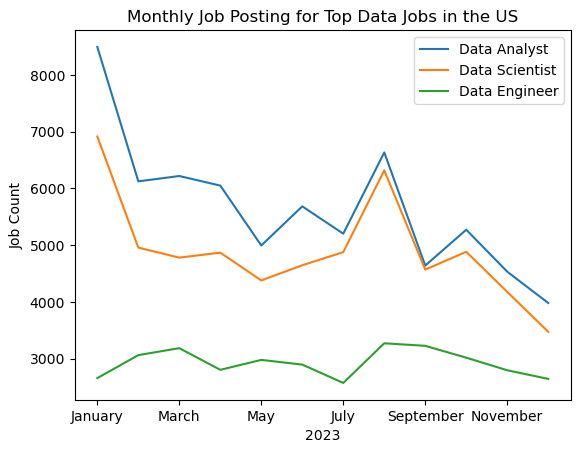

In [14]:
df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Posting for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

In [15]:
software_df= pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

In [16]:
software_df

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [17]:
df_US_merged= df_US_pivot.merge(software_df, on='job_posted_month')

In [18]:
top_5= df_US_merged.sum().sort_values(ascending=False).head(5).index.to_list()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

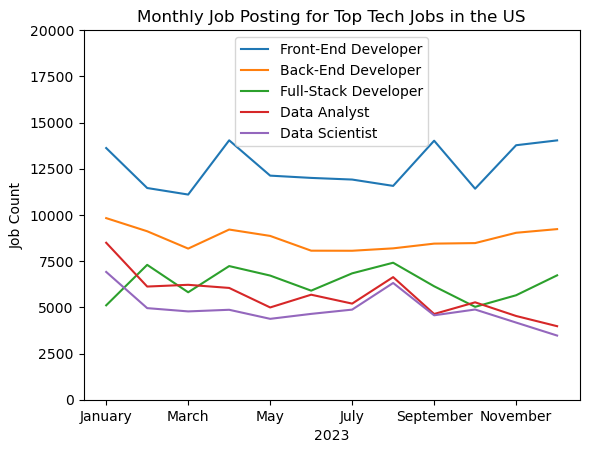

In [19]:
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job Posting for Top Tech Jobs in the US')
plt.ylabel('Job Count')
plt.xlabel('2023')
plt.ylim(0,20000)
plt.legend()
plt.show()

In [20]:
df['date_posted_month']= df['job_posted_date'].dt.strftime('%b')

In [21]:
monthes=df['date_posted_month'].unique()

In [22]:
month_list= {month: df[df['date_posted_month']== month] for month in monthes}

In [23]:
month_list['Nov'].head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,date_posted_month
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",Nov
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,None,NaN,NaN,Philips,"['python', 'qlik']","{'analyst_tools': ['qlik'], 'programming': ['p...",Nov
13,Senior Data Engineer,Senior Data Engineer,"New York, NY",via LinkedIn,Full-time,False,"Texas, United States",2023-11-15 13:08:52,True,True,United States,None,NaN,NaN,Nayya,"['python', 'sql', 'go', 'ruby', 'ruby', 'javas...","{'cloud': ['aws'], 'other': ['terraform'], 'pr...",Nov
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,Nov
41,Data Scientist,Data Scientist I,"Paris, KY",via Jobs By Care,Full-time,False,Georgia,2023-11-13 14:59:39,False,False,United States,None,NaN,NaN,Appalachian Regional Healthcare,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",Nov


# Quarter 1 of 2023

In [24]:
df_q1=pd.concat([month_list['Jan'], month_list['Feb'], month_list['Mar']], ignore_index=True)

<Axes: xlabel='date_posted_month'>

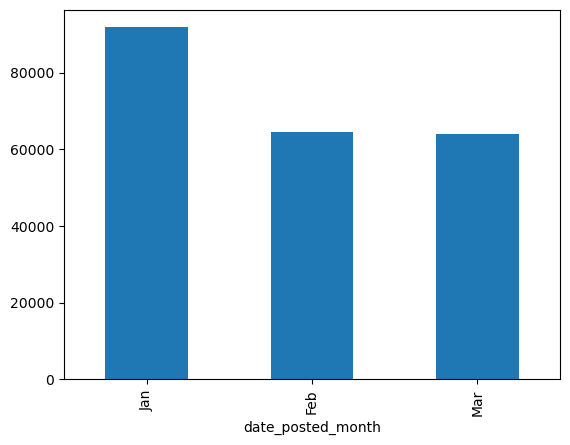

In [25]:
df_q1['date_posted_month'].value_counts().plot(kind='bar')

In [26]:
#df_q1.to_excel('quarter_1.xlsx')

In [27]:
df[pd.notna(df['salary_year_avg'])]['salary_year_avg']

28        109500.0
77        140000.0
92        120000.0
100       228222.0
109        89000.0
            ...   
785624    139216.0
785641    150000.0
785648    221875.0
785682    157500.0
785692    157500.0
Name: salary_year_avg, Length: 22003, dtype: float64

In [28]:
import ast

In [29]:
def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    
df['job_skills']= df['job_skills'].apply(clean_list)

In [30]:
df['job_skills'][1]

['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']

In [31]:
#df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [32]:
df_salary= df[pd.notna(df['salary_year_avg'])].copy()

In [33]:
def projected_salary(row):
    if "Senior" in row['job_title_short']:
        return 1.05 * row['salary_year_avg']
    else:
        return 1.03 * row['salary_year_avg']

df_salary['salary_year_inflated']= df_salary.apply(projected_salary, axis=1)

df_salary[['job_title_short', 'salary_year_avg', 'salary_year_inflated']]

,job_title_short,salary_year_avg,salary_year_inflated
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25
785682,Data Scientist,157500.0,162225.00


In [34]:
df_salary[df_salary['job_title_short'].str.contains("Senior")].head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,date_posted_month,salary_year_inflated
495,Senior Data Engineer,Senior Software Engineer (Data),"San Francisco, CA",via LinkedIn,Full-time,False,"Illinois, United States",2023-06-20 13:07:37,False,True,United States,year,168500.0,NaN,hackajob,"[scala, gcp, azure, spark, kafka, hadoop, terr...","{'cloud': ['gcp', 'azure'], 'libraries': ['spa...",Jun,176925.0
573,Senior Data Engineer,Senior Python Data Engineer,"Wilmington, DE",via Indeed,Full-time,False,Sudan,2023-09-16 13:13:50,False,False,Sudan,year,160000.0,NaN,Crackajack Solutions,"[python, sql, java, aws, databricks, redshift,...","{'cloud': ['aws', 'databricks', 'redshift'], '...",Sep,168000.0
657,Senior Data Engineer,Senior Data Engineer | Series D Video Analytic...,"Culver City, CA",via LinkedIn,Full-time,False,Georgia,2023-10-09 14:07:46,False,True,United States,year,165000.0,NaN,Coda Search│Staffing,"[python, scala, sql, aws, redshift, spark, pan...","{'cloud': ['aws', 'redshift'], 'libraries': ['...",Oct,173250.0
726,Senior Data Engineer,Senior Data Engineer (Hybrid),"Washington, DC",via Linux Careers,Full-time,False,"California, United States",2023-05-02 13:09:09,False,True,United States,year,173500.0,NaN,Capital One,"[java, scala, python, nosql, sql, shell, mysql...","{'cloud': ['redshift', 'snowflake', 'aws', 'az...",May,182175.0
733,Senior Data Engineer,Senior Data Engineer,"Oakland, CA",via LinkedIn,Full-time,False,Sudan,2023-07-06 13:41:35,False,False,Sudan,year,160000.0,NaN,X4 Life Sciences,"[python, sql, postgresql, sql server, aws, sno...","{'cloud': ['aws', 'snowflake'], 'databases': [...",Jul,168000.0


In [35]:
#df_salary['salary_year_inflated']=  df_salary.apply(lambda row: 1.05 * row['salary_year_avg'] if "Senior" in row['job_title_short'] else 1.03 * row['salary_year_avg'], axis=1)

In [36]:
data= {'job_title_short': ['Data Analyst', 'Data Scientist', 'Date Engineer'],
       'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]}

df_skill_lists= pd.DataFrame(data)
df_skill_lists

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Date Engineer,"[aws, python, airflow]"


In [37]:
for row in df_skill_lists.itertuples():
    for skill in row.job_skills:
        df_skill_lists[skill]= df_skill_lists['job_skills'].apply(lambda x: skill in x)
        df_skill_lists[skill]= df_skill_lists[skill].astype(int)
        
df_skill_lists.loc['Total']= df_skill_lists.sum()
df_skill_lists       

,job_title_short,job_skills,excel,sql,python,r,aws,airflow
0,Data Analyst,"[excel, sql, python]",1,1,1,0,0,0
1,Data Scientist,"[python, r]",0,0,1,1,0,0
2,Date Engineer,"[aws, python, airflow]",0,0,1,0,1,1
Total,Data AnalystData ScientistDate Engineer,"[excel, sql, python, python, r, aws, python, a...",1,1,3,1,1,1


In [38]:
df_exploded= df.explode('job_skills')
df_exploded.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,date_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan


In [39]:
skills_count= df_exploded.groupby(['job_title_short', 'job_skills']).size()
skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [40]:
df_skills_count= skills_count.reset_index(name='skill_count')
df_skills_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [41]:
df_skills_count= df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


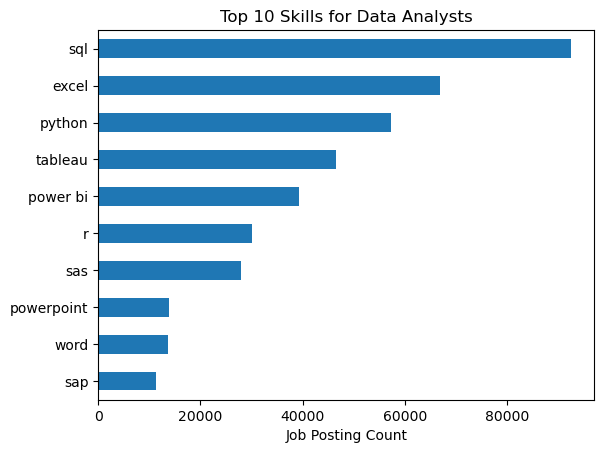

In [42]:
job_title= 'Data Analyst'
top_skills= 10
df_skill_final= df_skills_count[df_skills_count['job_title_short']== job_title].head(top_skills)
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

In [43]:
#df_skills_count.sort_values(by=['job_title_short','skill_count'], ascending=[True,False]).head(50)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [45]:
df_da= df[df['job_title_short']=='Data Analyst'].copy()

In [46]:
df_da['job_month']= df_da['job_posted_date'].dt.month

In [47]:
df_da_exploded= df_da.explode('job_skills')

In [48]:
df_da_pivot= df_da_exploded.pivot_table(index='job_month', columns='job_skills', aggfunc='size', fill_value=0)
df_da_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_month,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [49]:
df_da_pivot.loc['Total']= df_da_pivot.sum()
df_da_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_month,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [50]:
df_da_pivot= df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_pivot= df_da_pivot.drop('Total')
df_da_pivot


job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_month,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_da_pivot=df_da_pivot.reset_index()


In [54]:
df_da_pivot['job_posted_month']=pd.to_datetime(df_da_pivot['job_month'], format='%m').dt.strftime('%B')
df_da_pivot

job_skills,job_month,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,...,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess,job_posted_month
0,1,11336,8170,6606,5596,4285,3607,3830,1880,1778,...,0,0,1,0,0,0,1,0,0,January
1,2,7947,5772,4751,3936,3307,2576,2634,1291,1235,...,0,0,0,0,0,0,0,0,0,February
2,3,7868,5675,4741,4051,3176,2650,2554,1266,1203,...,1,0,0,0,0,1,0,0,0,March
3,4,7553,5496,4557,3776,3106,2399,2598,1190,1177,...,0,0,0,1,0,0,0,0,0,April
4,5,6617,4773,4070,3245,2695,2093,1940,979,957,...,0,0,0,0,0,0,0,0,1,May
5,6,7584,5724,4707,3812,3275,2442,2174,1173,1237,...,0,0,0,0,0,0,0,0,0,June
6,7,7687,5513,4831,3928,3350,2444,2118,1096,1069,...,0,1,0,0,0,0,0,0,0,July
7,8,8823,6482,5576,4533,3859,2975,2560,1332,1298,...,0,0,0,0,0,0,0,0,0,August
8,9,6829,4886,4229,3446,3118,2146,1880,944,945,...,0,0,0,0,0,0,0,0,0,September
9,10,7474,5217,4693,3709,3340,2380,2114,955,990,...,1,0,0,0,0,0,0,0,0,October


In [56]:
df_da_pivot=df_da_pivot.set_index('job_posted_month')
df_da_pivot= df_da_pivot.drop(columns='job_month')
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
February,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
March,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
April,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
June,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
July,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
August,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
September,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


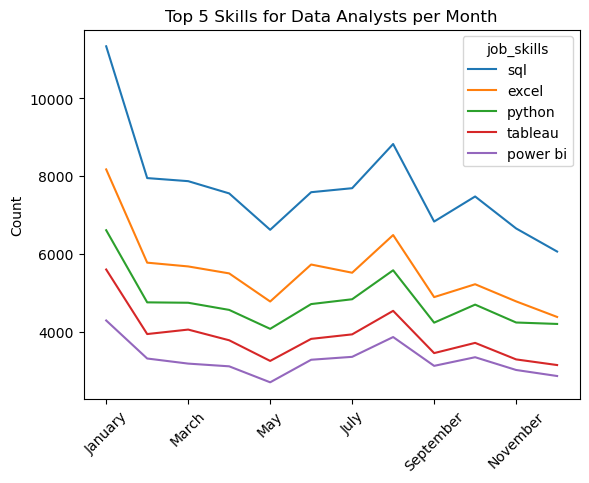

In [59]:
df_da_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel("Count")
plt.xlabel('')
plt.tick_params(axis='x', labelrotation=45)
plt.show()

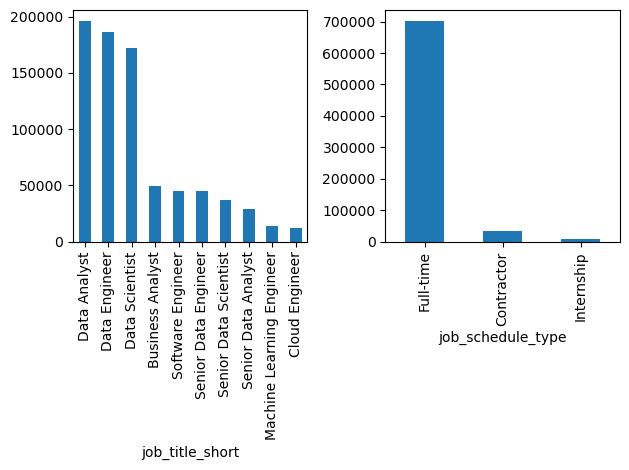

In [64]:
fig, ax= plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])
plt.tight_layout()

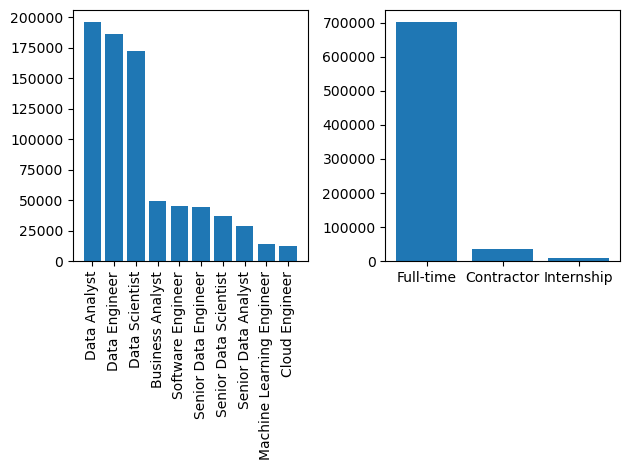

In [82]:
fig,ax= plt.subplots(1,2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))
ax[0].tick_params(axis='x', labelrotation=90)
plt.tight_layout()

In [83]:
df_skills=df.copy()
df_skills= df_skills.explode('job_skills')
skill_count= df_skills.groupby(['job_skills', 'job_title_short']).agg('size')
df_skill_count= skill_count.reset_index(name='skill_count')
df_skill_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skill_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


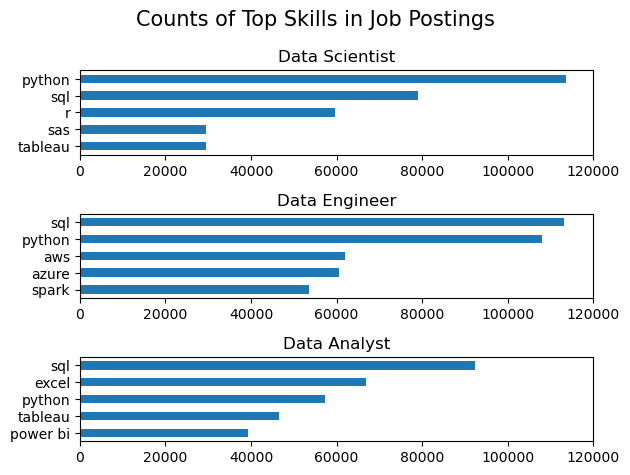

In [100]:
job_titles= ['Data Scientist', 'Data Engineer', 'Data Analyst']

fig, ax= plt.subplots(3,1)
for i, job_title in enumerate(job_titles):
    df_plot= df_skill_count[df_skill_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i])
    ax[i].set_title(f'{job_title}')
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()

    